# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [484]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [45]:
# Define a function to load data and aggregate them
path = r'C:\Users\adity\Documents\IIITB\Deep_Learning\RNN\Case_study\invoices\RNN_Stock_Starter_Dataset\RNN_Stocks_Data'

def csv_file_read_append(path):
    df = []#pd.DataFrame()
    csv_files = os.listdir(path)
    for csv in csv_files:
        full_path = os.path.join(path,csv)
        temp_read = pd.read_csv(full_path)
        df.append(temp_read)
    final_df = pd.concat(df,ignore_index = True)
    return final_df

Name
IBM      3020
AMZN     3019
GOOGL    3019
MSFT     3019
Name: count, dtype: int64

In [47]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files
all_csv_append = csv_file_read_append(path)
all_csv_append.Name.value_counts()


Name
IBM      3020
AMZN     3019
GOOGL    3019
MSFT     3019
Name: count, dtype: int64

In [73]:
# View specifics of the data
all_csv_append['Date'] = pd.to_datetime(all_csv_append['Date'])
all_csv_append['year'] = all_csv_append['Date'].dt.year
all_csv_append.head()


Date   Open   High    Low  Close   Volume  Name  year
0 2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN  2006
1 2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN  2006
2 2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN  2006
3 2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN  2006
4 2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN  2006

In [61]:
print(f'maximum year is {all_csv_append.groupby('Name')['year'].max()}')
print(f'minimum year is {all_csv_append.groupby('Name')['year'].min()}')

maximum year is Name
AMZN     2017
GOOGL    2017
IBM      2017
MSFT     2017
Name: year, dtype: int32
minimum year is Name
AMZN     2006
GOOGL    2006
IBM      2006
MSFT     2006
Name: year, dtype: int32


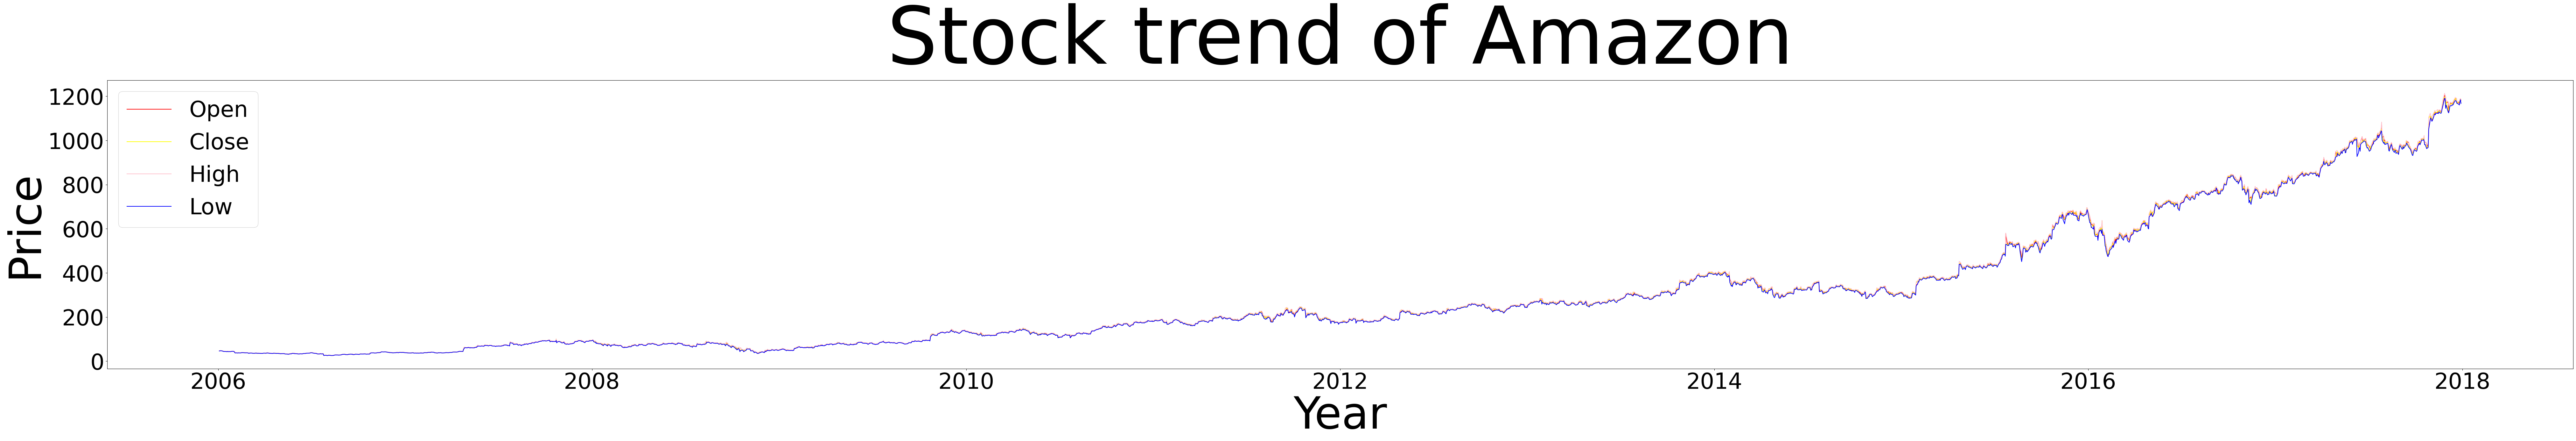

In [141]:
plt.figure(figsize=(100,40))
plt.subplot(3,1,1)
plt.plot(all_csv_append[all_csv_append['Name'] == 'AMZN']['Date'],all_csv_append[all_csv_append['Name'] == 'AMZN']['Open'], color= 'Red', label = 'Open')
plt.plot(all_csv_append[all_csv_append['Name'] == 'AMZN']['Date'],all_csv_append[all_csv_append['Name'] == 'AMZN']['Close'], color= 'Yellow', label = 'Close')
plt.plot(all_csv_append[all_csv_append['Name'] == 'AMZN']['Date'],all_csv_append[all_csv_append['Name'] == 'AMZN']['High'], color= 'pink', label = 'High')
plt.plot(all_csv_append[all_csv_append['Name'] == 'AMZN']['Date'],all_csv_append[all_csv_append['Name'] == 'AMZN']['Low'], color= 'Blue', label = 'Low')
plt.title('Stock trend of Amazon',fontsize = 180)
plt.ylabel('Price',fontsize=100)
plt.xlabel('Year',fontsize=100)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.legend(fontsize = 50)


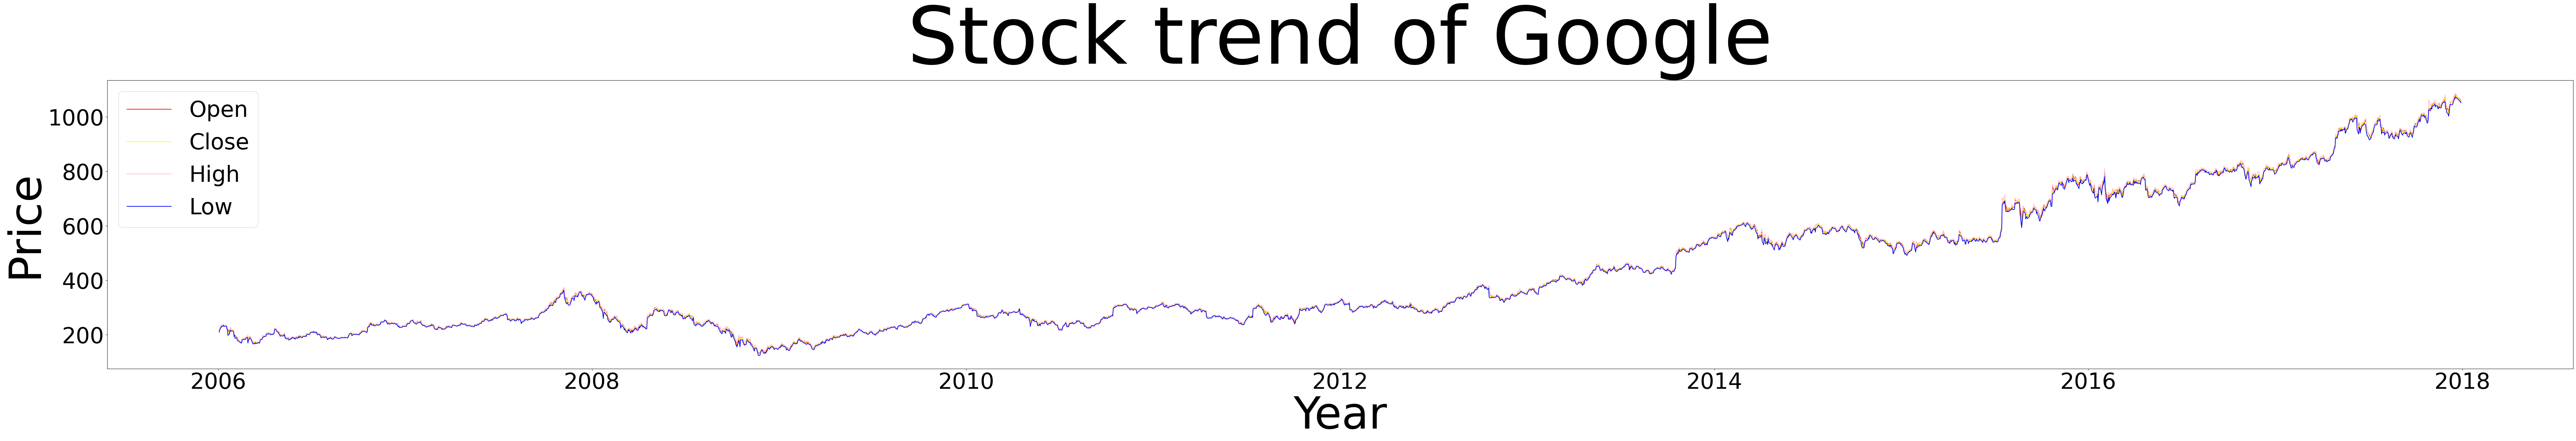

In [139]:
plt.figure(figsize=(100,40))
plt.subplot(3,1,1)
plt.plot(all_csv_append[all_csv_append['Name'] == 'GOOGL']['Date'],all_csv_append[all_csv_append['Name'] == 'GOOGL']['Open'], color= 'Red', label = 'Open')
plt.plot(all_csv_append[all_csv_append['Name'] == 'GOOGL']['Date'],all_csv_append[all_csv_append['Name'] == 'GOOGL']['Close'], color= 'Yellow', label = 'Close')
plt.plot(all_csv_append[all_csv_append['Name'] == 'GOOGL']['Date'],all_csv_append[all_csv_append['Name'] == 'GOOGL']['High'], color= 'pink', label = 'High')
plt.plot(all_csv_append[all_csv_append['Name'] == 'GOOGL']['Date'],all_csv_append[all_csv_append['Name'] == 'GOOGL']['Low'], color= 'Blue', label = 'Low')
plt.title('Stock trend of Google',fontsize = 180)
plt.ylabel('Price',fontsize=100)
plt.xlabel('Year',fontsize=100)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.legend(fontsize = 50)

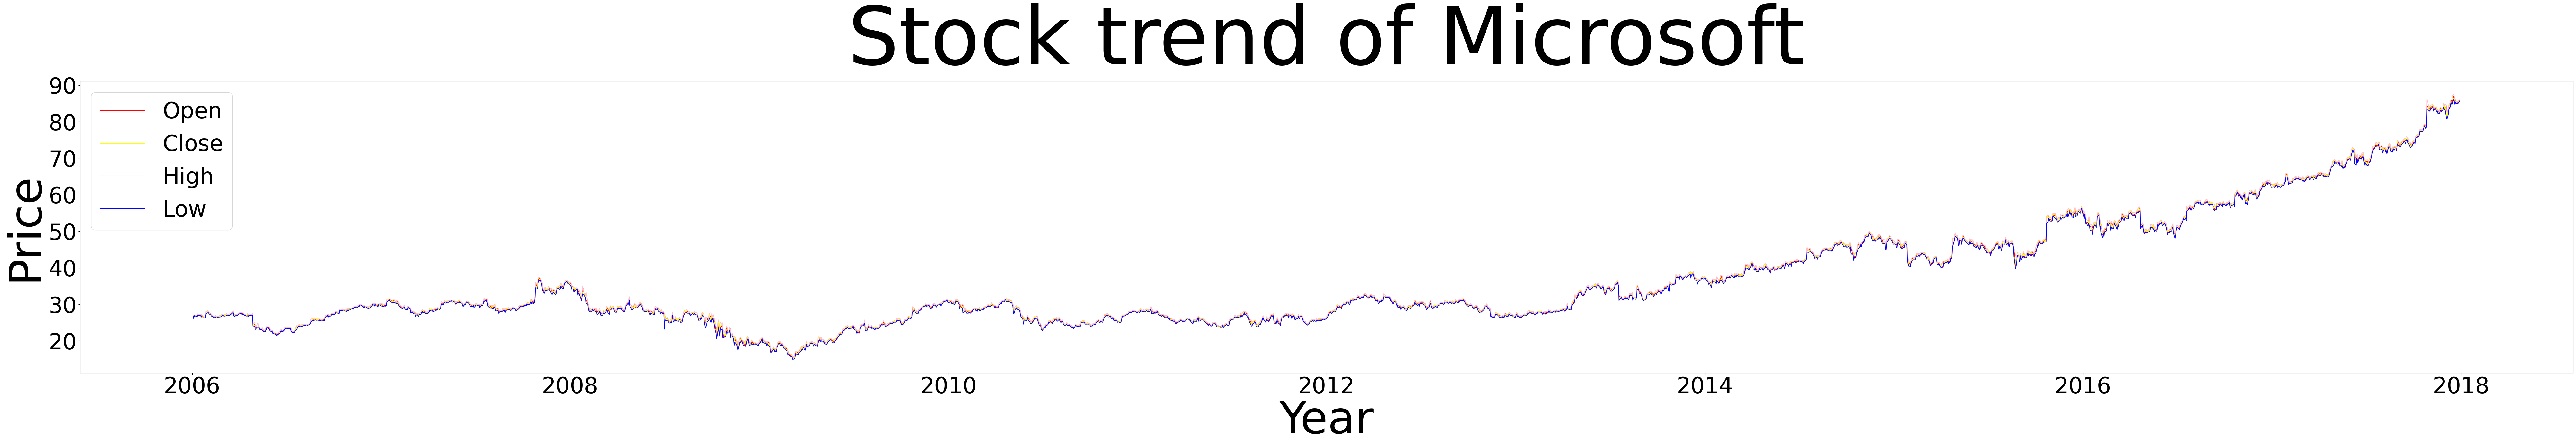

In [143]:
plt.figure(figsize=(100,40))
plt.subplot(3,1,1)
plt.plot(all_csv_append[all_csv_append['Name'] == 'MSFT']['Date'],all_csv_append[all_csv_append['Name'] == 'MSFT']['Open'], color= 'Red', label = 'Open')
plt.plot(all_csv_append[all_csv_append['Name'] == 'MSFT']['Date'],all_csv_append[all_csv_append['Name'] == 'MSFT']['Close'], color= 'Yellow', label = 'Close')
plt.plot(all_csv_append[all_csv_append['Name'] == 'MSFT']['Date'],all_csv_append[all_csv_append['Name'] == 'MSFT']['High'], color= 'pink', label = 'High')
plt.plot(all_csv_append[all_csv_append['Name'] == 'MSFT']['Date'],all_csv_append[all_csv_append['Name'] == 'MSFT']['Low'], color= 'Blue', label = 'Low')
plt.title('Stock trend of Microsoft',fontsize = 180)
plt.ylabel('Price',fontsize=100)
plt.xlabel('Year',fontsize=100)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.legend(fontsize = 50)

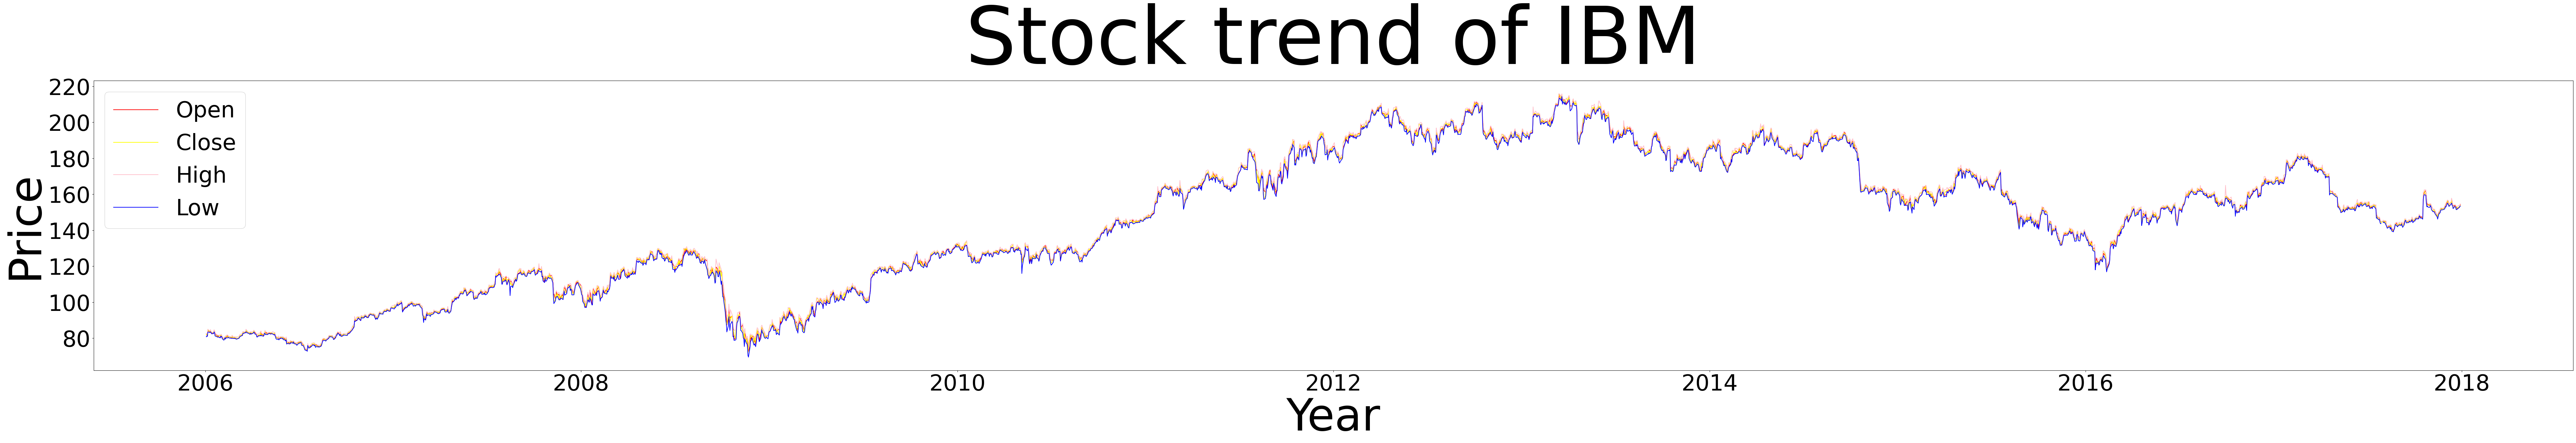

In [147]:
plt.figure(figsize=(100,40))
plt.subplot(3,1,1)
plt.plot(all_csv_append[all_csv_append['Name'] == 'IBM']['Date'],all_csv_append[all_csv_append['Name'] == 'IBM']['Open'], color= 'Red', label = 'Open')
plt.plot(all_csv_append[all_csv_append['Name'] == 'IBM']['Date'],all_csv_append[all_csv_append['Name'] == 'IBM']['Close'], color= 'Yellow', label = 'Close')
plt.plot(all_csv_append[all_csv_append['Name'] == 'IBM']['Date'],all_csv_append[all_csv_append['Name'] == 'IBM']['High'], color= 'pink', label = 'High')
plt.plot(all_csv_append[all_csv_append['Name'] == 'IBM']['Date'],all_csv_append[all_csv_append['Name'] == 'IBM']['Low'], color= 'Blue', label = 'Low')
plt.title('Stock trend of IBM',fontsize = 180)
plt.ylabel('Price',fontsize=100)
plt.xlabel('Year',fontsize=100)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.legend(fontsize = 50)

#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [227]:
# Handle Missing Values

all_csv_append.isnull().sum()

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
year      0
dtype: int64

In [213]:
all_csv_append.shape

(12077, 8)

In [215]:
all_csv_append[all_csv_append['Open'].isnull()]

Date  Open    High  Low   Close   Volume Name  year
8951 2017-07-31   NaN  144.93  NaN  144.67  4355718  IBM  2017

In [219]:
all_csv_append[all_csv_append['Low'].isnull()]

Date  Open    High  Low   Close   Volume Name  year
8951 2017-07-31   NaN  144.93  NaN  144.67  4355718  IBM  2017

In [229]:
all_stocks = all_csv_append.copy()

In [231]:
all_stocks.dropna(inplace = True)

In [233]:
all_stocks.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
year      0
dtype: int64

In [235]:
all_stocks.shape

(12076, 8)

### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

count    3.019000e+03
mean     5.931712e+06
std      5.122034e+06
min      9.864350e+05
25%      3.137037e+06
50%      4.724100e+06
75%      7.135246e+06
max      1.044046e+08
Name: Volume, dtype: float64

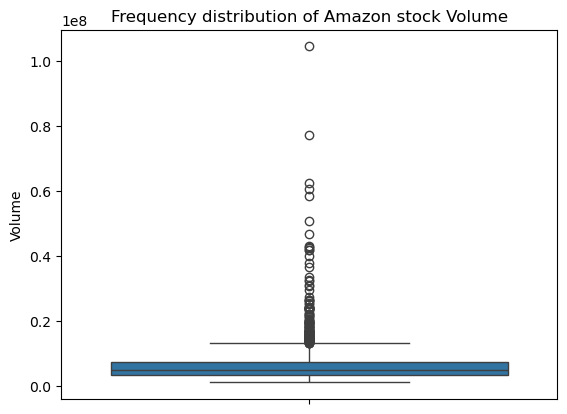

In [283]:
# Frequency distribution of volumes
plt.title('Frequency distribution of Amazon stock Volume')
sns.boxplot(y = all_stocks[all_stocks['Name'] == 'AMZN']['Volume'])
all_stocks[all_stocks['Name'] == 'AMZN'].Volume.describe()

count    3.019000e+03
mean     3.551504e+06
std      3.038599e+06
min      5.211410e+05
25%      1.760854e+06
50%      2.517630e+06
75%      4.242182e+06
max      4.118289e+07
Name: Volume, dtype: float64

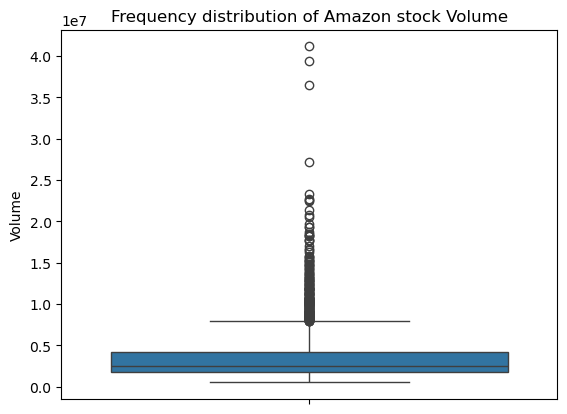

In [285]:
plt.title('Frequency distribution of Amazon stock Volume')
sns.boxplot(y = all_stocks[all_stocks['Name'] == 'GOOGL']['Volume'])
all_stocks[all_stocks['Name'] == 'GOOGL'].Volume.describe()

count    3.019000e+03
mean     5.161762e+07
std      3.114958e+07
min      7.425603e+06
25%      3.136557e+07
50%      4.617529e+07
75%      6.322291e+07
max      5.910786e+08
Name: Volume, dtype: float64

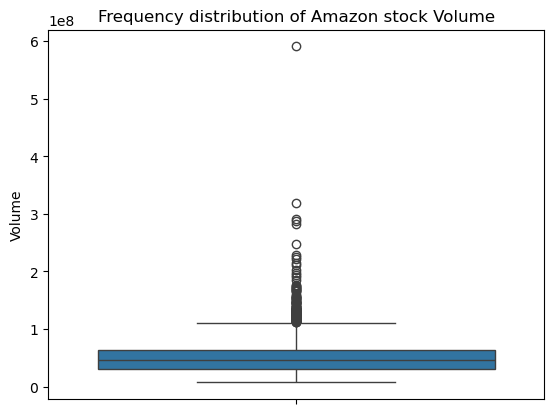

In [287]:
plt.title('Frequency distribution of Amazon stock Volume')
sns.boxplot(y = all_stocks[all_stocks['Name'] == 'MSFT']['Volume'])
all_stocks[all_stocks['Name'] == 'MSFT'].Volume.describe()

count    3.019000e+03
mean     5.773770e+06
std      3.193255e+06
min      2.542560e+05
25%      3.622178e+06
50%      4.931203e+06
75%      6.966642e+06
max      3.077428e+07
Name: Volume, dtype: float64

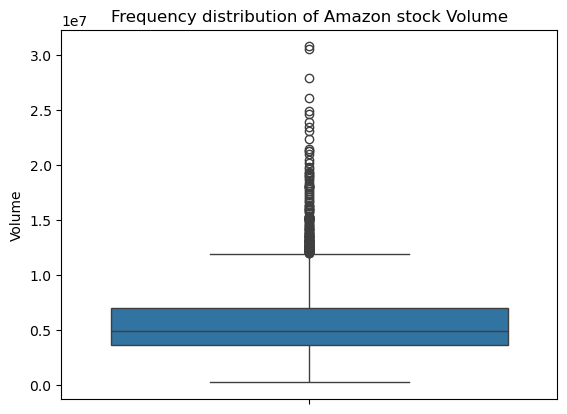

In [289]:
plt.title('Frequency distribution of Amazon stock Volume')
sns.boxplot(y = all_stocks[all_stocks['Name'] == 'IBM']['Volume'])
all_stocks[all_stocks['Name'] == 'IBM'].Volume.describe()

In [307]:
# Stock volume variation over time
plt.figure(figsize = (100,100))
plt.subplot(4,1,1)
plt.title('Amazon', fontsize = 100)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.legend(fontsize = 50)
plt.plot(all_csv_append[all_csv_append['Name'] == 'AMZN']['Date'],all_csv_append[all_csv_append['Name'] == 'AMZN']['Volume'], color= 'Red', label = 'Open')
plt.subplot(4,1,2)
plt.title('Google', fontsize = 100)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.legend(fontsize = 50)
plt.plot(all_csv_append[all_csv_append['Name'] == 'GOOGL']['Date'],all_csv_append[all_csv_append['Name'] == 'GOOGL']['Volume'], color= 'Yellow', label = 'Close')
plt.subplot(4,1,3)
plt.title('IBM', fontsize = 100)
plt.plot(all_csv_append[all_csv_append['Name'] == 'IBM']['Date'],all_csv_append[all_csv_append['Name'] == 'IBM']['Volume'], color= 'pink', label = 'High')
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.legend(fontsize = 50)
plt.subplot(4,1,4)
plt.title('Microsoft', fontsize = 100)
plt.plot(all_csv_append[all_csv_append['Name'] == 'MSFT']['Date'],all_csv_append[all_csv_append['Name'] == 'MSFT']['Volume'], color= 'Blue', label = 'Low')
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.legend(fontsize = 50)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

<Axes: >

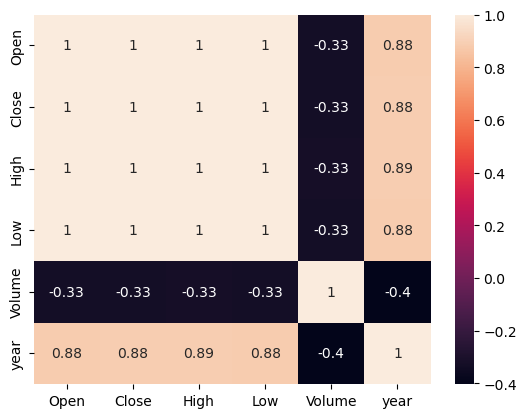

In [319]:
# Analyse correlations
corr = all_stocks[all_stocks['Name']=='AMZN'][['Open','Close','High','Low','Volume','year']].corr()
sns.heatmap(corr, annot = True)


### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [322]:
# Define a function that divides the data into windows and generates target variable values for each window
# for function testing taking subset of all_stocks dataframe
amzn = all_stocks[all_stocks['Name'] == 'AMZN'][['Date','Name','Close']]

Date  Name    Close
0    2006-01-03  AMZN    47.58
1    2006-01-04  AMZN    47.25
2    2006-01-05  AMZN    47.65
3    2006-01-06  AMZN    47.87
4    2006-01-09  AMZN    47.08
...         ...   ...      ...
3014 2017-12-22  AMZN  1168.36
3015 2017-12-26  AMZN  1176.76
3016 2017-12-27  AMZN  1182.26
3017 2017-12-28  AMZN  1186.10
3018 2017-12-29  AMZN  1169.47

[3019 rows x 3 columns]

In [454]:
def create_windows(df, stock_name, window_size = 3, stride_size = 1):
    df = df[df['Name'].isin(stock_name)]
    df = df.sort_values(by = ['Name','Date'])
    window = []
    for name, group in df.groupby('Name'):
        group = group.reset_index(drop = True)
        for i in range(0,len(group)-window_size, stride_size):
            window_df = group.iloc[i:i+window_size]
            window.append({
                'X': window_df[['Date', 'Name']].copy(),
                'y': window_df[['Close']].copy()
                }) 
    return window

window_all_stocks = create_windows(all_stocks, ['MSFT','IBM','AMZN','GOOGL'], window_size = 5, stride_size = 1)

In [456]:
len(window_all_stocks)

12056

In [458]:
window_all_stocks[10000]['X'][window_all_stocks[10000]['X']['Name'] == 'MSFT']

Date  Name
958 2009-10-22  MSFT
959 2009-10-23  MSFT
960 2009-10-26  MSFT
961 2009-10-27  MSFT
962 2009-10-28  MSFT

In [445]:
all_stocks.Name.value_counts()

Name
AMZN     3019
GOOGL    3019
IBM      3019
MSFT     3019
Name: count, dtype: int64

#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [480]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows

def window_scaling(df):
    length_windows = len(df)
    scaler = StandardScaler()
    for i in range(length_windows):
        df[i]['X']['Date'] = pd.to_datetime(df[i]['X']['Date'])
        df[i]['y'][['Close']] = df[i]['y'][['Close']].astype(float)
        scaler.partial_fit(df[i]['y'][['Close']])
        df[i]['y'][['Close']] = scaler.transform(df[i]['y'][['Close']])
    return df   
    
abc = window_scaling(window_all_stocks)

In [482]:
abc

[{'X':         Date  Name
  0 2006-01-03  AMZN
  1 2006-01-04  AMZN
  2 2006-01-05  AMZN
  3 2006-01-06  AMZN
  4 2006-01-09  AMZN,
  'y':       Close
  0  0.330806
  1 -0.830533
  2  0.577150
  3  1.351376
  4 -1.428798},
 {'X':         Date  Name
  1 2006-01-04  AMZN
  2 2006-01-05  AMZN
  3 2006-01-06  AMZN
  4 2006-01-09  AMZN
  5 2006-01-10  AMZN,
  'y':       Close
  1 -0.069783
  2  0.579358
  3  0.936386
  4 -0.345668
  5 -2.666347},
 {'X':         Date  Name
  2 2006-01-05  AMZN
  3 2006-01-06  AMZN
  4 2006-01-09  AMZN
  5 2006-01-10  AMZN
  6 2006-01-11  AMZN,
  'y':       Close
  2  0.647598
  3  0.894945
  4  0.006746
  5 -1.601007
  6 -2.410505},
 {'X':         Date  Name
  3 2006-01-06  AMZN
  4 2006-01-09  AMZN
  5 2006-01-10  AMZN
  6 2006-01-11  AMZN
  7 2006-01-12  AMZN,
  'y':       Close
  3  0.957248
  4  0.250495
  5 -1.028818
  6 -1.672947
  7 -2.182883},
 {'X':         Date  Name
  4 2006-01-09  AMZN
  5 2006-01-10  AMZN
  6 2006-01-11  AMZN
  7 2006-01-12  AMZ

Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [606]:
# Define a function to create input and output data points from the master DataFrame

def window_train_test(df, stock_name, window_size = 5, stride_size = 1, train_split = 0.8):
    window_all_stocks = create_windows(df, stock_name, window_size = window_size, stride_size = stride_size)
    scaled_window_df = window_scaling(window_all_stocks)
    train, test = train_test_split(scaled_window_df, train_size = train_split, shuffle = False)
    X_train = [window['X'] for window in train]
    y_train = [window['y'] for window in train]
    X_test = [window['X'] for window in test]
    y_test = [window['y'] for window in test]
    return X_train, y_train, X_test, y_test


In [526]:
X_train, y_train , X_test, y_test= window_train_test(all_stocks, ['AMZN'],window_size = 5, stride_size = 1, train_split = 0.8 )

In [527]:
X_train[0]

Date  Name
0 2006-01-03  AMZN
1 2006-01-04  AMZN
2 2006-01-05  AMZN
3 2006-01-06  AMZN
4 2006-01-09  AMZN

Date  Name
1 2006-01-04  AMZN
2 2006-01-05  AMZN
3 2006-01-06  AMZN
4 2006-01-09  AMZN
5 2006-01-10  AMZN

We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

In [ ]:
# Checking for patterns in different sequence lengths
quarterly_var = all_stocks.groupby(['Name',all_stocks['Date'].dt.to_period('Q')])['Close'].var().reset_index()
quarterly_var['Date'] = quarterly_var['Date'].dt.to_timestamp()


In [580]:
quarterly_var.groupby('Name')['Close'].describe()

count        mean          std        min         25%         50%  \
Name                                                                       
AMZN    48.0  516.443438  1069.668546   1.444102   49.137774  123.950958   
GOOGL   48.0  461.807421   553.278263  58.795293  137.613858  318.286435   
IBM     48.0   26.911824    22.529468   2.058065    9.625184   19.282479   
MSFT    48.0    2.805699     2.648252   0.170545    0.896872    1.987911   

              75%          max  
Name                            
AMZN   505.750884  6577.265348  
GOOGL  453.747635  2834.760728  
IBM     37.915474   102.581326  
MSFT     4.046249    12.667297

In [562]:
monthly_var = all_stocks.groupby(['Name',all_stocks['Date'].dt.to_period('M')])['Close'].var().reset_index()
monthly_var['Date'] = monthly_var['Date'].dt.to_timestamp()

In [570]:
monthly_var.groupby('Name')['Close'].describe()

count        mean         std       min        25%        50%  \
Name                                                                   
AMZN   144.0  132.008904  263.391007  0.306287  14.168741  38.935321   
GOOGL  144.0  176.356082  349.079947  6.692627  38.909950  82.290051   
IBM    144.0   12.000673   15.719162  0.360004   3.250762   6.512046   
MSFT   144.0    1.001713    1.471268  0.031605   0.303456   0.501222   

              75%          max  
Name                            
AMZN   128.178102  2039.041924  
GOOGL  202.966504  3709.347579  
IBM     16.118317   128.832004  
MSFT     0.985879     9.512904

In [574]:
weekly_var = all_stocks.groupby(['Name',all_stocks['Date'].dt.to_period('W')])['Close'].var().reset_index()
weekly_var['Date'] = weekly_var['Date'].dt.to_timestamp()

In [576]:
weekly_var.groupby('Name')['Close'].describe()

count       mean         std      min       25%        50%        75%  \
Name                                                                           
AMZN   626.0  43.726526  158.983064  0.01337  2.279913   8.231429  31.375655   
GOOGL  626.0  48.373017  135.844403  0.11213  7.162233  16.828000  43.101292   
IBM    626.0   3.555865    6.803799  0.01908  0.539737   1.462450   3.580645   
MSFT   626.0   0.300859    0.605447  0.00305  0.052632   0.125875   0.295472   

              max  
Name               
AMZN   3343.71987  
GOOGL  2723.35428  
IBM      79.17043  
MSFT      6.65333

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [608]:
# Create data instances from the master data frame using decided window size and window stride
# From above analysis the major visible median variation over the period of quarter. 
# Maximum variations are almost comparable with each other so as minimum. 
# Decision: Window of Quarter/90 days and stride of week or 7 days.

X_train_amzn, y_train_amzn , X_test_amzn, y_test_amzn= window_train_test(all_stocks, ['AMZN'],window_size = 90, stride_size = 7, train_split = 0.8 )
X_train_googl, y_train_googl , X_test_googl, y_test_googl= window_train_test(all_stocks, ['GOOGL'],window_size = 90, stride_size = 7, train_split = 0.8 )
X_train_IBM, y_train_IBM , X_test_IBM, y_test_IBM= window_train_test(all_stocks, ['IBM'],window_size = 90, stride_size = 7, train_split = 0.8 )
X_train_msft, y_train_msft , X_test_msft, y_test_msft= window_train_test(all_stocks, ['MSFT'],window_size = 90, stride_size = 7, train_split = 0.8 )
X_train, y_train , X_test, y_test= window_train_test(all_stocks, ['AMZN','MSFT','GOOGL','IBM'],window_size = 90, stride_size = 7, train_split = 0.8 )

In [609]:
# Check the number of data points generated
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

1340 1340
336 336


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [616]:
# Check if the datasets are compatible inputs to neural networks
X_train[1]


Date  Name
7  2006-01-12  AMZN
8  2006-01-13  AMZN
9  2006-01-17  AMZN
10 2006-01-18  AMZN
11 2006-01-19  AMZN
..        ...   ...
92 2006-05-16  AMZN
93 2006-05-17  AMZN
94 2006-05-18  AMZN
95 2006-05-19  AMZN
96 2006-05-22  AMZN

[90 rows x 2 columns]

## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [ ]:
# Create a function that creates a simple RNN model according to the model configuration arguments



#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration based on evaluation metrics



#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model



Plotting the actual vs predicted values

In [ ]:
# Predict on the test data and plot



It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [ ]:
# Compute the performance of the model on the testing data set



### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [ ]:
# # Define a function to create a model and specify default values for hyperparameters



#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration



#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [ ]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model



In [ ]:
# Compute the performance of the model on the testing data set


Plotting the actual vs predicted values

In [ ]:
# Predict on the test data


## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [ ]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [ ]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.